# HiSIF-DTA


A notebook for "**HiSIF-DTA: A Hierarchical Semantic Information Fusion Framework for Drug-Target Affinity Prediction**". In this study, we propose a protein semantic fusion-based DTA (Drug-Target Affinity) prediction method and design two different backbones for the semantic fusion process, namely **_TDNet (Top-Down)_** and **_BUNet (Bottom-Up)_**. To validate the effectiveness of our proposed method, we selected three benchmark datasets, namely **Davis**, **KIBA**, and **Human**, along with several relevant baseline models for evaluation. It is worth noting that, to ensure fair comparison, we retrained the baseline models, and their respective training code can be found in the **'baselines'** directory of our repository. The following presents the prediction results and performance comparison between our proposed model and other baseline models.

==============================================================================================================

## 1. Baseline models

Detailed information about each baseline model can be found at the following link: [Click](https://github.com/bixiangpeng/HiSIF-DTA/blob/main/baselines/README.md).

## 2. Parameter tuning

### 2.1 _Top-Down_

In [1]:
#!pip install lifelines

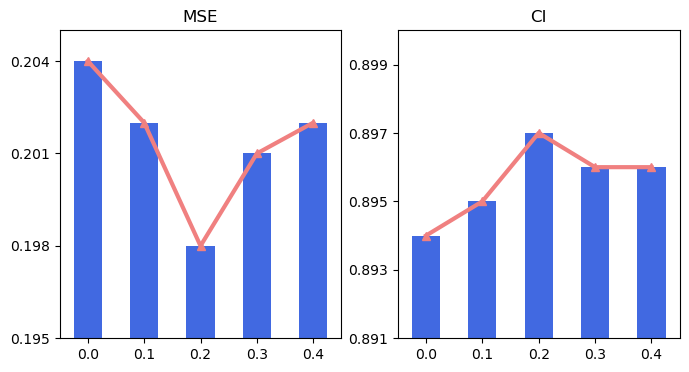

In [2]:
import pandas as pd
import numpy as np
from urllib.parse import quote
from lifelines.utils import concordance_index
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import matplotlib.pyplot as plt


def mse(y,f):
    mse = ((y - f)**2).mean(axis=0)
    return mse

backbones = ['TDNet','BUNet']
para_space = [0, 0.1, 0.2, 0.3, 0.4]
TD_MSE_list = []
TD_CI_list = []
for para in para_space:
    results = []
    for fold in range(1,6):
        url = f'https://zenodo.org/record/8402218/files/predicted_value_of_{backbones[0]}_dropedge_{para}_on_davis_test{fold} .csv'
        url = quote(url, safe=':/')
        df = pd.read_csv(url)
        G = np.array(list(df['label']))
        P = np.array(list(df['predicted value']))
        results.append([mse(G,P),concordance_index(G,P)])
    valid_results = np.array(results)
    valid_results = [np.mean(valid_results, axis=0), np.std(valid_results, axis=0)]
    TD_MSE_list.append(eval('{:.3f}'.format(valid_results[0][0])))
    TD_CI_list.append(eval('{:.3f}'.format(valid_results[0][1])))

plt.figure(1,(8,4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.plot(para_space, TD_MSE_list, c = 'lightcoral', marker = '^', lw = 3)
ax1.bar(para_space, TD_MSE_list,width=0.05,color='royalblue')
ax1_x_ticks = np.arange(0,0.5,0.1)
ax1_y_ticks = np.arange(0.195,0.205,0.003)
ax1.set_xlim((-0.05, 0.45))
ax1.set_ylim((0.195, 0.205))
ax1.set_xticks(ax1_x_ticks)
ax1.set_yticks(ax1_y_ticks)
ax1.set_title('MSE')

ax2.plot(para_space, TD_CI_list, c = 'lightcoral', marker = '^', lw = 3)
ax2.bar(para_space, TD_CI_list,width=0.05,color='royalblue')
ax2_x_ticks = np.arange(0,0.5,0.1)
ax2_y_ticks = np.arange(0.891,0.899,0.002)
ax2.set_xlim((-0.05, 0.45))
ax2.set_ylim((0.891, 0.900))
ax2.set_xticks(ax2_x_ticks)
ax2.set_yticks(ax2_y_ticks)
ax2.set_title('CI')

plt.show()

### 2.2 _Bottom-Up_

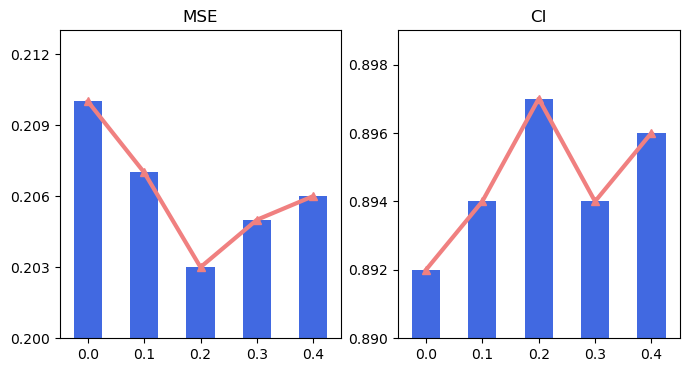

In [3]:
BU_MSE_list = []
BU_CI_list = []
for para in para_space:
    results = []
    for fold in range(1,6):
        url = f'https://zenodo.org/record/8402218/files/predicted_value_of_{backbones[1]}_dropedge_{para}_on_davis_test{fold} .csv'
        url = quote(url, safe=':/')
        df = pd.read_csv(url)
        G = np.array(list(df['label']))
        P = np.array(list(df['predicted value']))
        results.append([mse(G,P),concordance_index(G,P)])
    valid_results = np.array(results)
    valid_results = [np.mean(valid_results, axis=0), np.std(valid_results, axis=0)]
    BU_MSE_list.append(eval('{:.3f}'.format(valid_results[0][0])))
    BU_CI_list.append(eval('{:.3f}'.format(valid_results[0][1])))

plt.figure(2,(8,4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.plot(para_space, BU_MSE_list, c = 'lightcoral', marker = '^', lw = 3)
ax1.bar(para_space, BU_MSE_list,width=0.05,color='royalblue')
ax1_x_ticks = np.arange(0,0.5,0.1)
ax1_y_ticks = np.arange(0.2,0.213,0.003)
ax1.set_xlim((-0.05, 0.45))
ax1.set_ylim((0.2, 0.213))
ax1.set_xticks(ax1_x_ticks)
ax1.set_yticks(ax1_y_ticks)
ax1.set_title('MSE')

ax2.plot(para_space, BU_CI_list, c = 'lightcoral', marker = '^', lw = 3)
ax2.bar(para_space, BU_CI_list,width=0.05,color='royalblue')
ax2_x_ticks = np.arange(0,0.5,0.1)
ax2_y_ticks = np.arange(0.89,0.899,0.002)
ax2.set_xlim((-0.05, 0.45))
ax2.set_ylim((0.89, 0.899))
ax2.set_xticks(ax2_x_ticks)
ax2.set_yticks(ax2_y_ticks)
ax2.set_title('CI')

plt.show()


## 3. Comparative experiments

### 3.1 Davis 

In [4]:
# Davis
DTA_models = ['DeepDTA','AttentionDTA','GraphDTA','MGraphDTA','DGraphDTA','TDNet','BUNet']
davis_MSE_list = []
davis_CI_list = []
for model in DTA_models:
    url = f'https://zenodo.org/record/8385073/files/predicted_value_of_{model}_on_davis .csv'
    url = quote(url, safe=':/')
    df = pd.read_csv(url)
    G = np.array(list(df['label']))
    P = np.array(list(df['predicted value']))
    davis_MSE_list.append("{:.3f}".format(mse(G,P)))
    davis_CI_list.append("{:.3f}".format(concordance_index(G,P)))

performance_on_davis = {
    'MSE':davis_MSE_list,
    'CI':davis_CI_list
}
df_performance_on_davis = pd.DataFrame(performance_on_davis)
df_performance_on_davis.index = DTA_models
print(df_performance_on_davis)

                MSE     CI
DeepDTA       0.253  0.879
AttentionDTA  0.244  0.885
GraphDTA      0.230  0.885
MGraphDTA     0.207  0.895
DGraphDTA     0.202  0.905
TDNet         0.193  0.907
BUNet         0.191  0.906


### 3.2 KIBA

In [5]:
kiba_MSE_list = []
kiba_CI_list = []
for model in DTA_models:
    url = f'https://zenodo.org/record/8385073/files/predicted_value_of_{model}_on_kiba .csv'
    url = quote(url, safe=':/')
    df = pd.read_csv(url)
    G = np.array(list(df['label']))
    P = np.array(list(df['predicted value']))
    kiba_MSE_list.append("{:.3f}".format(mse(G,P)))
    kiba_CI_list.append("{:.3f}".format(concordance_index(G,P)))

performance_on_kiba = {
    'MSE':kiba_MSE_list,
    'CI':kiba_CI_list
}
df_performance_on_kiba = pd.DataFrame(performance_on_kiba)
df_performance_on_kiba.index = DTA_models
print(df_performance_on_kiba)

                MSE     CI
DeepDTA       0.187  0.854
AttentionDTA  0.175  0.867
GraphDTA      0.146  0.885
MGraphDTA     0.128  0.902
DGraphDTA     0.127  0.902
TDNet         0.120  0.904
BUNet         0.121  0.904


### 3.3 Human

In [7]:
CPI_models = ['CPI-GNN','DrugVQA','TransformerCPI','GraphDTA','TDNet','BUNet']
AUC_list = []
Precision_list = []
Recall_list = []
for model in CPI_models:
    results = []
    for fold in range(1,6):
        url = f'https://zenodo.org/record/8385073/files/predicted_value_of_{model}_on_Human_test{fold} .csv'
        url = quote(url, safe=':/')
        df = pd.read_csv(url)
        G = np.array(list(df['label']))
        P = np.array(list(df['predicted value']))
        P_label = np.array(list(df['predicted label']))
        AUC = roc_auc_score(G, P)
        precision = precision_score(G, P_label)
        recall = recall_score(G, P_label)
        results.append([AUC, precision, recall])
    valid_results = np.array(results)
    valid_results = [np.mean(valid_results, axis=0), np.std(valid_results, axis=0)]
    AUC_list.append('{:.3f}'.format(valid_results[0][0]))
    Precision_list.append('{:.3f}'.format(valid_results[0][1]))
    Recall_list.append('{:.3f}'.format(valid_results[0][2]))
performance_on_Human = {
    'AUC': AUC_list,
    'Precision': Precision_list,
    'Recall':Recall_list
}
df_performance_on_Human = pd.DataFrame(performance_on_Human)
df_performance_on_Human.index = CPI_models
print(df_performance_on_Human)

                  AUC Precision Recall
CPI-GNN         0.965     0.919  0.912
DrugVQA         0.966     0.921  0.914
TransformerCPI  0.974     0.914  0.923
GraphDTA        0.975     0.930  0.917
TDNet           0.988     0.945  0.952
BUNet           0.986     0.947  0.947


## 4. Ablation experiments

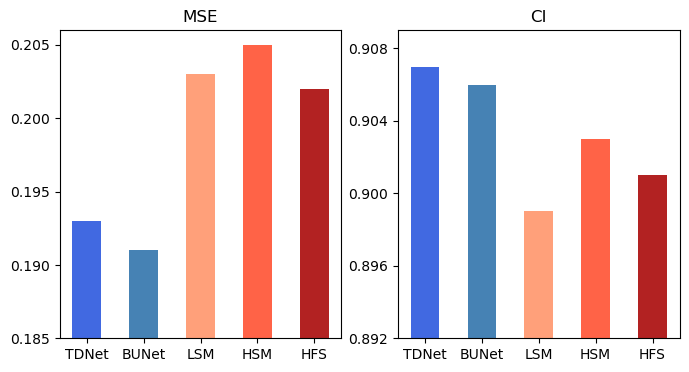

In [8]:
ablation_models = ['TDNet','BUNet','LSM','HSM','HFS']
color_list = ['royalblue','steelblue','lightsalmon','tomato','firebrick']
ablation_MSE_list = []
ablation_CI_list = []

for model in ablation_models:
    url = f'https://zenodo.org/record/8418121/files/predicted_value_of_{model}_on_davis .csv'
    url = quote(url, safe=':/')
    df = pd.read_csv(url)
    G = np.array(list(df['label']))
    P = np.array(list(df['predicted value']))
    ablation_MSE_list.append(eval("{:.3f}".format(mse(G,P))))
    ablation_CI_list.append(eval("{:.3f}".format(concordance_index(G,P))))
    
plt.figure(1,(8,4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

for i in range(len(ablation_models)):
    ax1.bar(ablation_models[i], ablation_MSE_list[i],width=0.5,color=color_list[i])
ax1_y_ticks = np.arange(0.185,0.206,0.005)
ax1.set_ylim((0.185, 0.206))
ax1.set_yticks(ax1_y_ticks)
ax1.set_title('MSE')

for i in range(len(ablation_models)):
    ax2.bar(ablation_models[i], ablation_CI_list[i],width=0.5,color=color_list[i])
ax2_y_ticks = np.arange(0.892,0.909,0.004)
ax2.set_ylim((0.892, 0.909))
ax2.set_yticks(ax2_y_ticks)
ax2.set_title('CI')

plt.show()